# Notebook to find Hashtag Doublets and Demultiplex multinucleated data using `HTODemux`

**Created by :** Srivalli Kolla

**Created on :** 01 April, 2025

**Modified on :** 01 April, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [1]:
import scanpy as sc
import pandas as pd
import datetime
import os
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        25.1.0
attrs                       25.1.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.12
decorator                   5.2.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.13.0
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  8.1.5
isoduration               

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


# Importing files

In [3]:
after_cb_adata = sc.read_h5ad('./Github/Nuclear_hashing_2025/data/demultiplexed_HTODemux_cb_filtered.h5ad')
after_cb_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

In [4]:
after_cb_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident
TACCCATTCGAACGCT-1,SeuratProject,112387.0,11611,1922.0,3,TotalSeqB7,TotalSeqB4,2.110876,TotalSeqB4_TotalSeqB7,Doublet,Doublet,Doublet
TACTCATCACCAGGAC-1,SeuratProject,101605.0,11034,1335.0,2,TotalSeqB7,TotalSeqB6,5.294113,TotalSeqB7,Singlet,TotalSeqB7,Singlet
GCTGCGATCCGCCAGA-1,SeuratProject,96436.0,10765,2369.0,4,TotalSeqB3,TotalSeqB1,5.968628,TotalSeqB3,Singlet,TotalSeqB3,Singlet
TGCCGTTCATGAATGC-1,SeuratProject,95368.0,10673,1133.0,5,TotalSeqB7,TotalSeqB5,1.610980,TotalSeqB5_TotalSeqB7,Doublet,Doublet,Doublet
ATCGTTGAGGATCTAT-1,SeuratProject,94100.0,10010,2628.0,1,TotalSeqB4,TotalSeqB1,5.842015,TotalSeqB4,Singlet,TotalSeqB4,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,SeuratProject,5298.0,1349,14.0,7,TotalSeqB3,TotalSeqB9,0.695320,Negative,Negative,Negative,Negative
GCCAATATCCCCTGAC-1,SeuratProject,6784.0,2101,13.0,1,TotalSeqB4,TotalSeqB1,0.992906,TotalSeqB4,Singlet,TotalSeqB4,Singlet
GTCCTATTCGCGAATC-1,SeuratProject,6612.0,2059,2.0,2,TotalSeqB1,TotalSeqB6,0.027029,Negative,Negative,Negative,Negative
AGTGATCCAAAGGTTC-1,SeuratProject,5905.0,1421,5.0,1,TotalSeqB6,TotalSeqB1,1.088662,Negative,Negative,Negative,Negative


In [5]:
after_cb_adata.var

""
Xkr4
Gm1992
Gm19938
Gm37381
Rp1
...
TotalSeqB5
TotalSeqB6
TotalSeqB7
TotalSeqB8


In [6]:
after_cb_adata.obs['HTO_classification'].unique()

['TotalSeqB4_TotalSeqB7', 'TotalSeqB7', 'TotalSeqB3', 'TotalSeqB5_TotalSeqB7', 'TotalSeqB4', ..., 'TotalSeqB5_TotalSeqB9', 'TotalSeqB8', 'TotalSeqB1', 'TotalSeqB6', 'TotalSeqB9']
Length: 37
Categories (37, object): ['Negative', 'TotalSeqB1', 'TotalSeqB1_TotalSeqB3', 'TotalSeqB1_TotalSeqB4', ..., 'TotalSeqB7_TotalSeqB9', 'TotalSeqB8', 'TotalSeqB8_TotalSeqB9', 'TotalSeqB9']

# Adding Metadata

In [7]:
metadata = pd.read_csv('./Github/Nuclear_hashing_2025/data/Nuclei_hashing_metadata.csv', sep = ';')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,assigned_hashtag
0,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,Hash1
1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,Hash9
2,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,Hash3
3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,Hash4
4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads,Hash5
5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,Hash6
6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,Hash7
7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard,Hash8


In [8]:
metadata = metadata.set_index('assigned_hashtag')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
assigned_hashtag,,,,,,,
Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard
Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
Hash5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads
Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard
Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
Hash8,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard


Modifiying the assigned_hashtag names to match the metadata

In [9]:
after_cb_adata.obs['HTO_classification'] = after_cb_adata.obs['HTO_classification'].str.replace('TotalSeqB', 'Hash')
after_cb_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident
TACCCATTCGAACGCT-1,SeuratProject,112387.0,11611,1922.0,3,TotalSeqB7,TotalSeqB4,2.110876,Hash4_Hash7,Doublet,Doublet,Doublet
TACTCATCACCAGGAC-1,SeuratProject,101605.0,11034,1335.0,2,TotalSeqB7,TotalSeqB6,5.294113,Hash7,Singlet,TotalSeqB7,Singlet
GCTGCGATCCGCCAGA-1,SeuratProject,96436.0,10765,2369.0,4,TotalSeqB3,TotalSeqB1,5.968628,Hash3,Singlet,TotalSeqB3,Singlet
TGCCGTTCATGAATGC-1,SeuratProject,95368.0,10673,1133.0,5,TotalSeqB7,TotalSeqB5,1.610980,Hash5_Hash7,Doublet,Doublet,Doublet
ATCGTTGAGGATCTAT-1,SeuratProject,94100.0,10010,2628.0,1,TotalSeqB4,TotalSeqB1,5.842015,Hash4,Singlet,TotalSeqB4,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,SeuratProject,5298.0,1349,14.0,7,TotalSeqB3,TotalSeqB9,0.695320,Negative,Negative,Negative,Negative
GCCAATATCCCCTGAC-1,SeuratProject,6784.0,2101,13.0,1,TotalSeqB4,TotalSeqB1,0.992906,Hash4,Singlet,TotalSeqB4,Singlet
GTCCTATTCGCGAATC-1,SeuratProject,6612.0,2059,2.0,2,TotalSeqB1,TotalSeqB6,0.027029,Negative,Negative,Negative,Negative
AGTGATCCAAAGGTTC-1,SeuratProject,5905.0,1421,5.0,1,TotalSeqB6,TotalSeqB1,1.088662,Negative,Negative,Negative,Negative


In [10]:
after_cb_adata.obs = after_cb_adata.obs.join(metadata, on="HTO_classification", how="left")

after_cb_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
TACCCATTCGAACGCT-1,SeuratProject,112387.0,11611,1922.0,3,TotalSeqB7,TotalSeqB4,2.110876,Hash4_Hash7,Doublet,Doublet,Doublet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TACTCATCACCAGGAC-1,SeuratProject,101605.0,11034,1335.0,2,TotalSeqB7,TotalSeqB6,5.294113,Hash7,Singlet,TotalSeqB7,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16.0,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
GCTGCGATCCGCCAGA-1,SeuratProject,96436.0,10765,2369.0,4,TotalSeqB3,TotalSeqB1,5.968628,Hash3,Singlet,TotalSeqB3,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12.0,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
TGCCGTTCATGAATGC-1,SeuratProject,95368.0,10673,1133.0,5,TotalSeqB7,TotalSeqB5,1.610980,Hash5_Hash7,Doublet,Doublet,Doublet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATCGTTGAGGATCTAT-1,SeuratProject,94100.0,10010,2628.0,1,TotalSeqB4,TotalSeqB1,5.842015,Hash4,Singlet,TotalSeqB4,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13.0,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,SeuratProject,5298.0,1349,14.0,7,TotalSeqB3,TotalSeqB9,0.695320,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCCAATATCCCCTGAC-1,SeuratProject,6784.0,2101,13.0,1,TotalSeqB4,TotalSeqB1,0.992906,Hash4,Singlet,TotalSeqB4,Singlet,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13.0,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
GTCCTATTCGCGAATC-1,SeuratProject,6612.0,2059,2.0,2,TotalSeqB1,TotalSeqB6,0.027029,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGTGATCCAAAGGTTC-1,SeuratProject,5905.0,1421,5.0,1,TotalSeqB6,TotalSeqB1,1.088662,Negative,Negative,Negative,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# QC check

## Mt and Ribo Genes

In [11]:
after_cb_adata.var['mt'] = after_cb_adata.var_names.str.startswith('mt-') 
after_cb_adata.var['ribo'] = after_cb_adata.var_names.str.startswith(("Rps","Rpl"))
after_cb_adata.var

,mt,ribo
Xkr4,False,False
Gm1992,False,False
Gm19938,False,False
Gm37381,False,False
Rp1,False,False
...,...,...
TotalSeqB5,False,False
TotalSeqB6,False,False
TotalSeqB7,False,False
TotalSeqB8,False,False


In [12]:
ribo_counts = after_cb_adata.var['ribo'].value_counts()

mt_counts = after_cb_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32192
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32280
True: 13


### Calculating QC metrics per cell

In [13]:
sc.pp.calculate_qc_metrics(after_cb_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
after_cb_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    layers: 'logcounts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

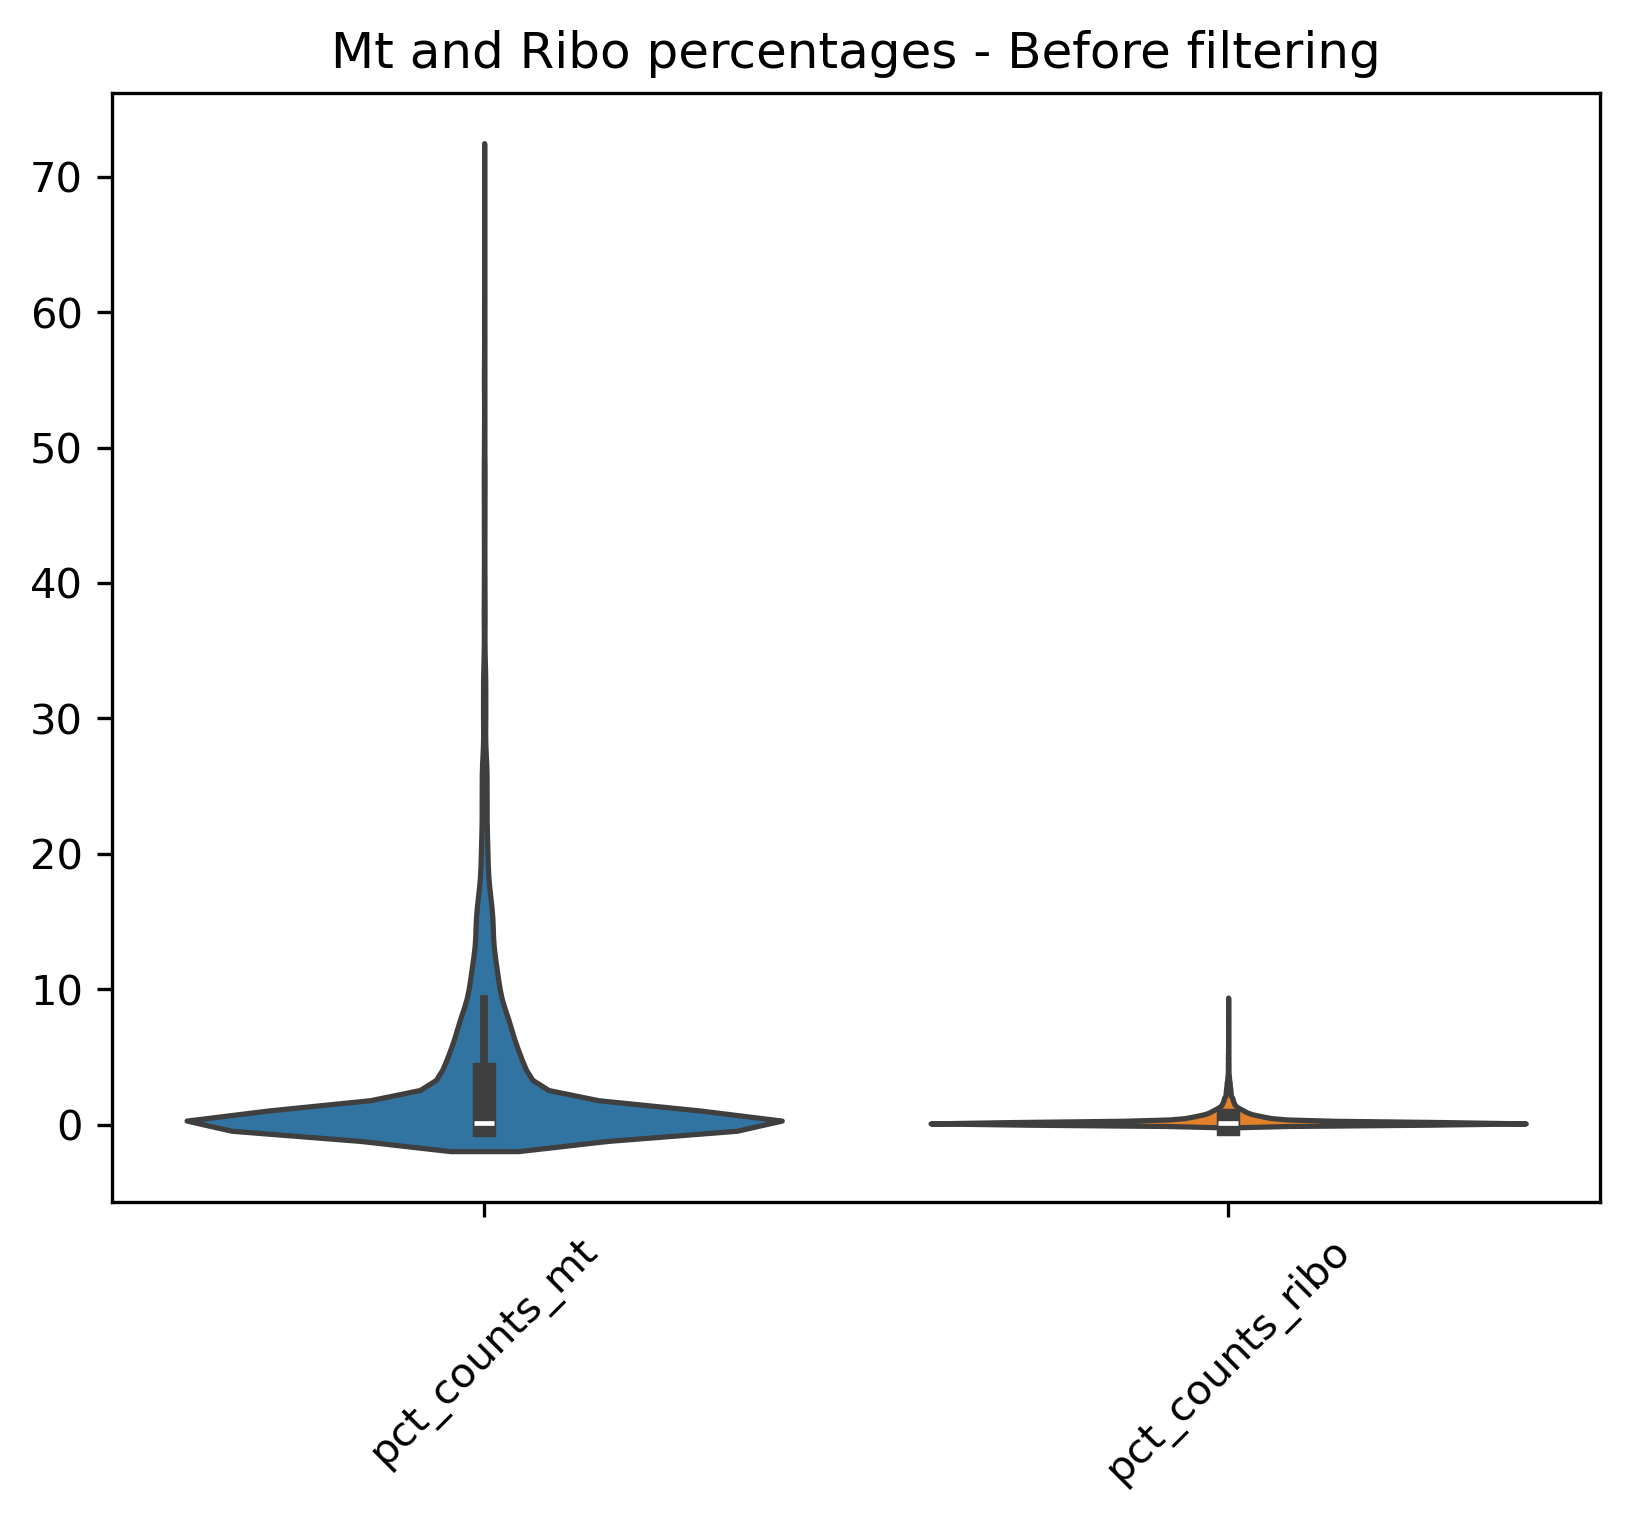

In [14]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=after_cb_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

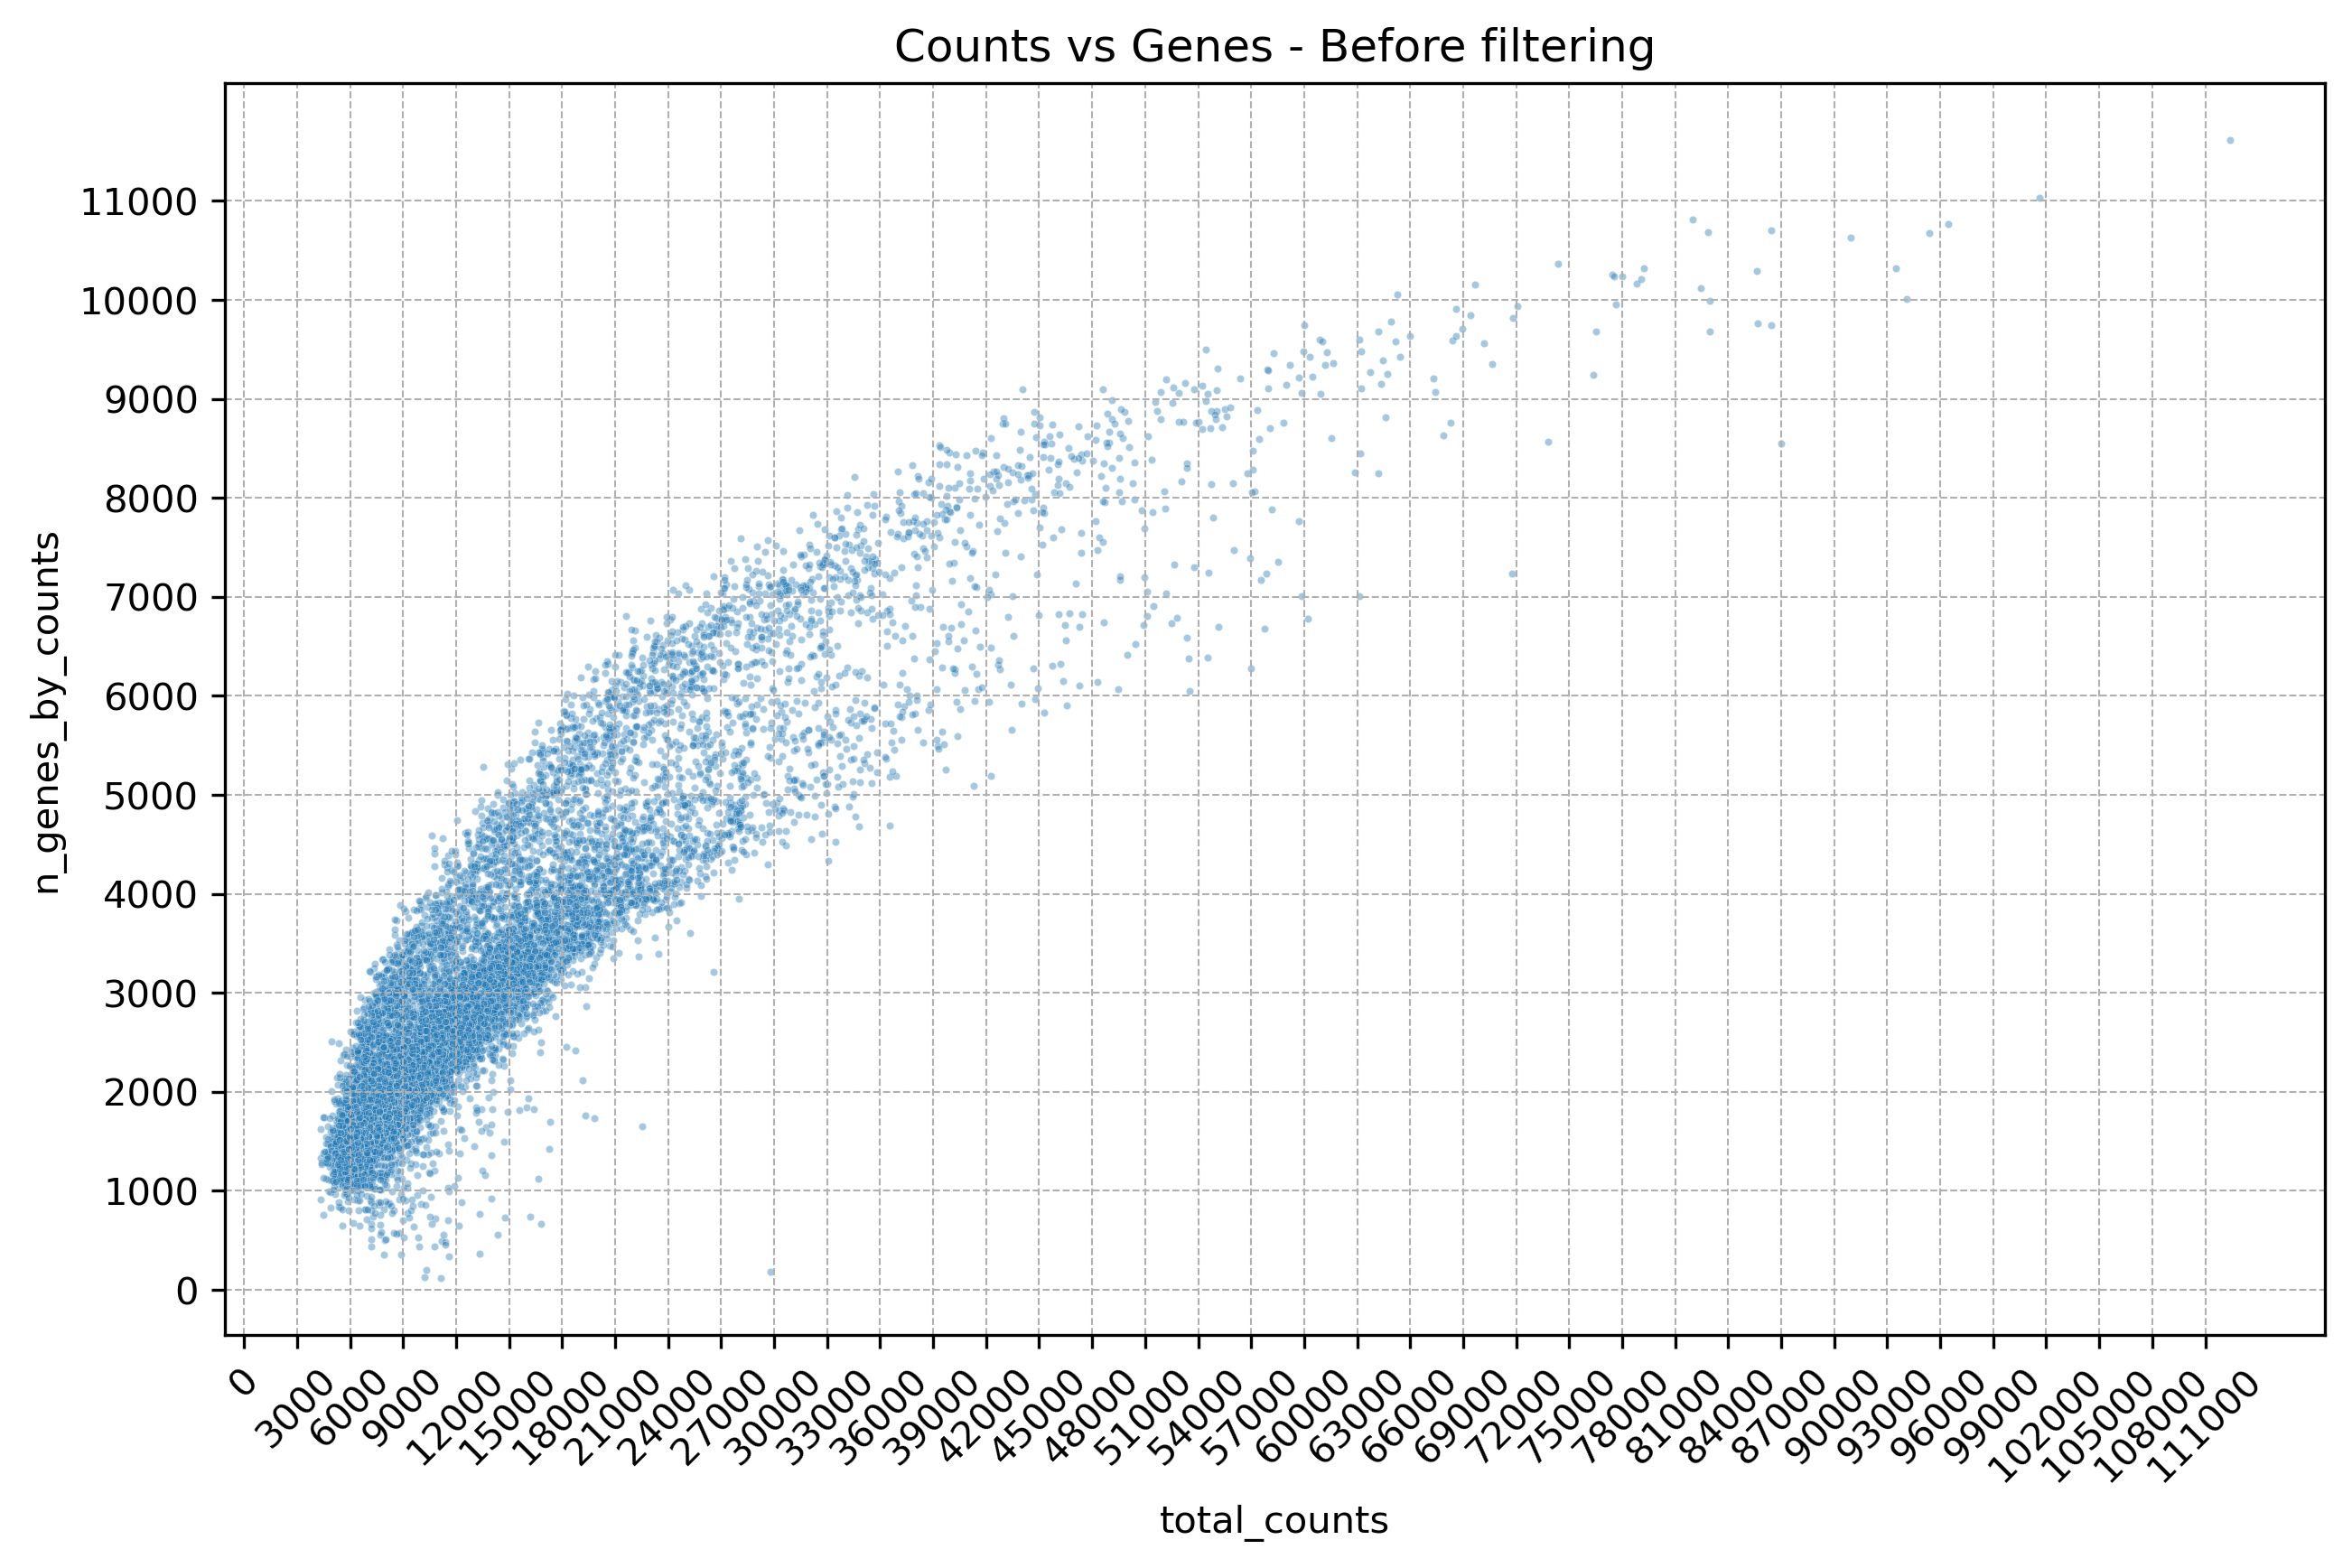

In [15]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=after_cb_adata.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
plt.xticks(range(0, int(max(after_cb_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(after_cb_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [16]:
filtered_object = after_cb_adata[after_cb_adata.obs['pct_counts_mt'] < 20]
filtered_object

View of AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    layers: 'logcounts'

# Clustering

In [17]:
sc.pp.neighbors(filtered_object)
sc.tl.leiden(filtered_object)
filtered_object

computing neighbors
computing PCA
    with n_comps=50


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32293 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:12)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:40)
running Leiden clustering


/tmp/ipykernel_1272971/3210525439.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(filtered_object)


    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [18]:
filtered_object

AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [19]:
filtered_object.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,...,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
TACCCATTCGAACGCT-1,SeuratProject,112387.0,11611,1922.0,3,TotalSeqB7,TotalSeqB4,2.110876,Hash4_Hash7,Doublet,...,NaN,NaN,NaN,11611,112387.0,3246.0,2.888234,609.0,0.541878,6
TACTCATCACCAGGAC-1,SeuratProject,101605.0,11034,1335.0,2,TotalSeqB7,TotalSeqB6,5.294113,Hash7,Singlet,...,noninf,TotalSeqB7,Magnetic Beads,11034,101605.0,4172.0,4.106097,580.0,0.570838,6
GCTGCGATCCGCCAGA-1,SeuratProject,96436.0,10765,2369.0,4,TotalSeqB3,TotalSeqB1,5.968628,Hash3,Singlet,...,MCMV,TotalSeqB3,Magnetic Beads,10765,96436.0,562.0,0.582770,209.0,0.216724,6
TGCCGTTCATGAATGC-1,SeuratProject,95368.0,10673,1133.0,5,TotalSeqB7,TotalSeqB5,1.610980,Hash5_Hash7,Doublet,...,NaN,NaN,NaN,10673,95368.0,2938.0,3.080698,585.0,0.613413,6
ATCGTTGAGGATCTAT-1,SeuratProject,94100.0,10010,2628.0,1,TotalSeqB4,TotalSeqB1,5.842015,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,10010,94100.0,3261.0,3.465462,303.0,0.321998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,SeuratProject,5298.0,1349,14.0,7,TotalSeqB3,TotalSeqB9,0.695320,Negative,Negative,...,NaN,NaN,NaN,1349,5298.0,0.0,0.000000,4.0,0.075500,11
GCCAATATCCCCTGAC-1,SeuratProject,6784.0,2101,13.0,1,TotalSeqB4,TotalSeqB1,0.992906,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2101,6784.0,1.0,0.014741,4.0,0.058962,12
GTCCTATTCGCGAATC-1,SeuratProject,6612.0,2059,2.0,2,TotalSeqB1,TotalSeqB6,0.027029,Negative,Negative,...,NaN,NaN,NaN,2059,6612.0,1.0,0.015124,3.0,0.045372,12
AGTGATCCAAAGGTTC-1,SeuratProject,5905.0,1421,5.0,1,TotalSeqB6,TotalSeqB1,1.088662,Negative,Negative,...,NaN,NaN,NaN,1421,5905.0,2.0,0.033870,8.0,0.135478,3


In [20]:
filtered_object.obs['HTO_classification'].value_counts()

HTO_classification
Hash4          2404
Negative       1740
Hash5          1462
Hash7           850
Hash3           738
Hash3_Hash8     224
Hash1_Hash3     200
Hash4_Hash9     194
Hash3_Hash9     187
Hash1_Hash4     166
Hash4_Hash5     164
Hash1_Hash5     156
Hash3_Hash6     148
Hash4_Hash6     131
Hash5_Hash9     129
Hash6_Hash7     124
Hash4_Hash8     124
Hash3_Hash4     123
Hash4_Hash7     121
Hash5_Hash7     121
Hash1_Hash7     121
Hash7_Hash9     120
Hash7_Hash8     120
Hash3_Hash5     119
Hash1_Hash8     119
Hash9           116
Hash3_Hash7     109
Hash5_Hash8     109
Hash5_Hash6     108
Hash1           105
Hash8_Hash9     103
Hash1_Hash9      91
Hash6            81
Hash6_Hash9      74
Hash6_Hash8      69
Hash1_Hash6      65
Hash8            56
Name: count, dtype: int64

In [21]:
filtered_object.obs['leiden'].value_counts()

leiden
0     1032
1      999
2      959
3      909
4      812
5      785
6      777
7      694
8      633
9      612
10     513
11     503
12     421
13     394
14     351
15     349
16     341
17     107
Name: count, dtype: int64

# Doublet and Negatives Check

In [22]:
doublets = filtered_object[filtered_object.obs['HTO_classification.global'] == 'Doublet'].copy()
doublets

AnnData object with n_obs × n_vars = 3639 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [23]:
doublets.obs['leiden'].value_counts()

leiden
7     495
8     423
9     344
15    313
14    306
6     255
2     238
0     183
1     170
4     157
16    143
5     114
10    107
3     102
17     87
11     77
13     63
12     62
Name: count, dtype: int64

In [24]:
negatives = filtered_object[filtered_object.obs['HTO_classification.global'] == 'Negative'].copy()
negatives

AnnData object with n_obs × n_vars = 1740 × 32293
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [25]:
negatives.obs['leiden'].value_counts()

leiden
3     348
1     306
11    239
5     233
0     212
12    161
2     126
16     47
6      30
9      26
8      12
Name: count, dtype: int64

# Plotting

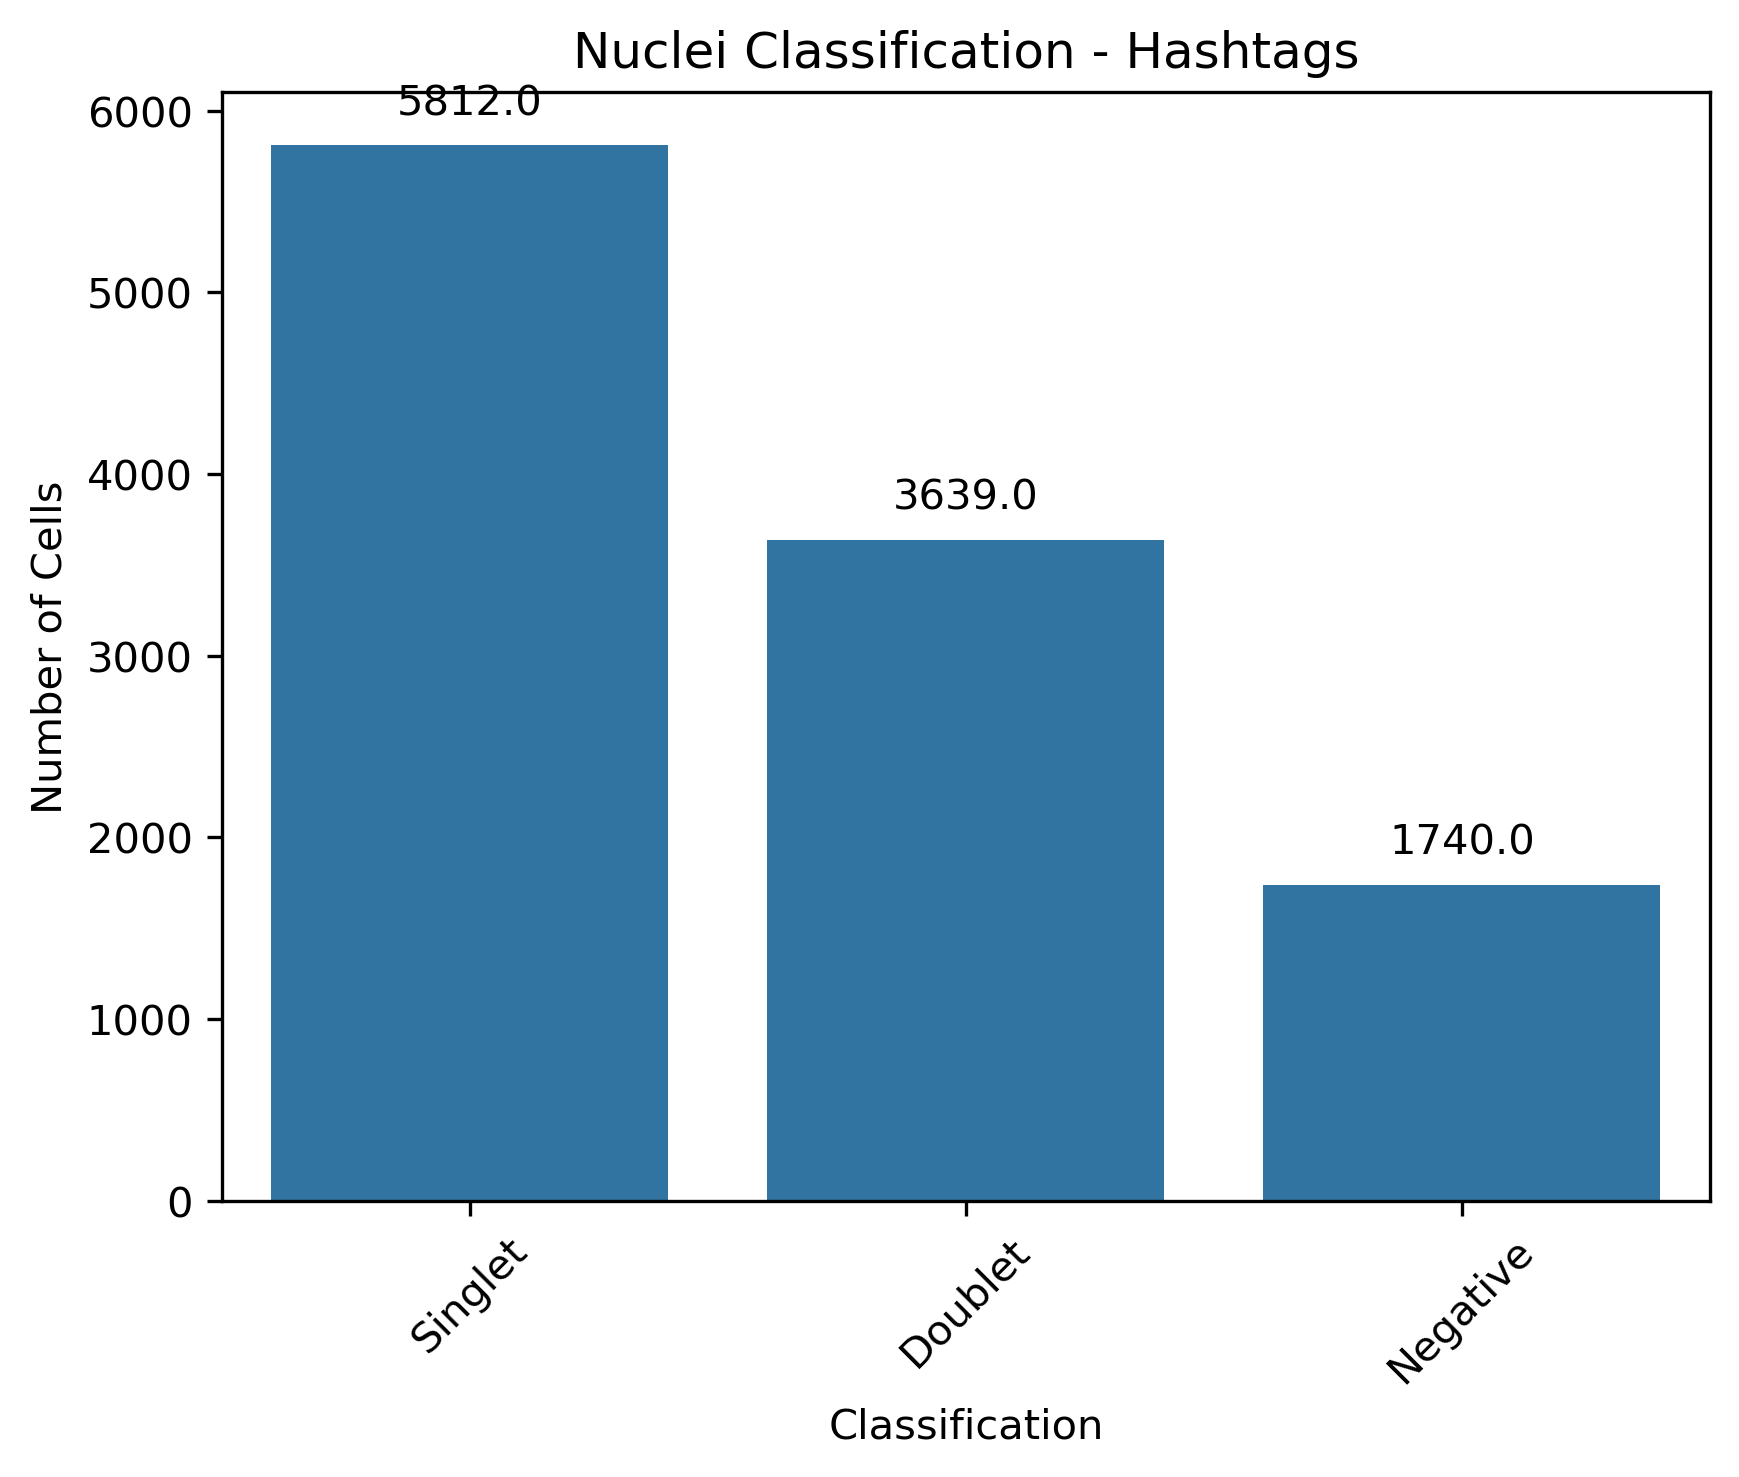

In [26]:
ax = sb.countplot(data=filtered_object.obs, x='HTO_classification.global', order=filtered_object.obs['HTO_classification.global'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

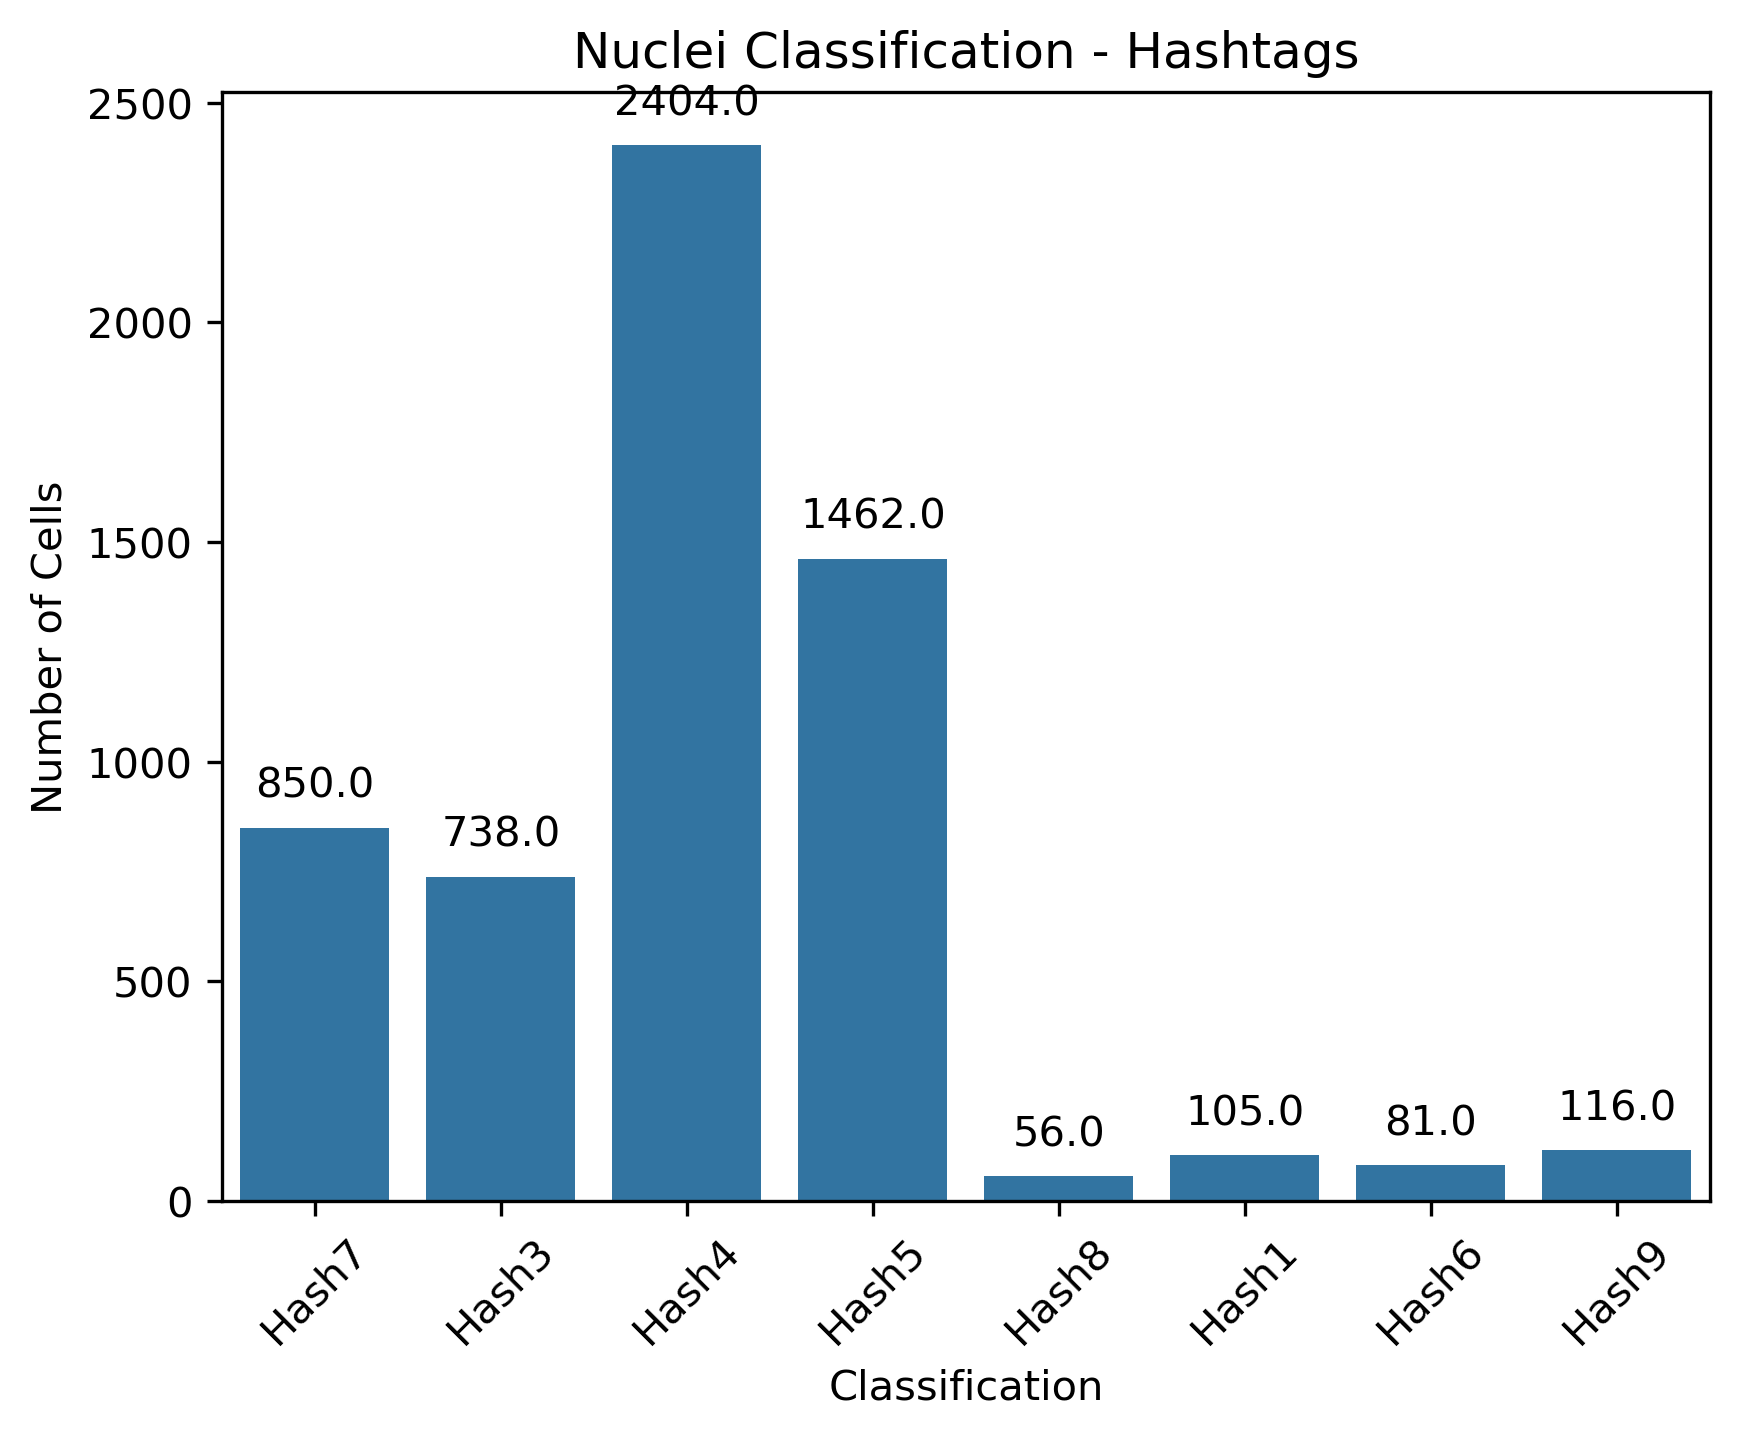

In [27]:
without_doublets = filtered_object[~filtered_object.obs['HTO_classification.global'].isin(['Doublet', 'Negative'])]

ax = sb.countplot(data=without_doublets.obs, x='HTO_classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45) 
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

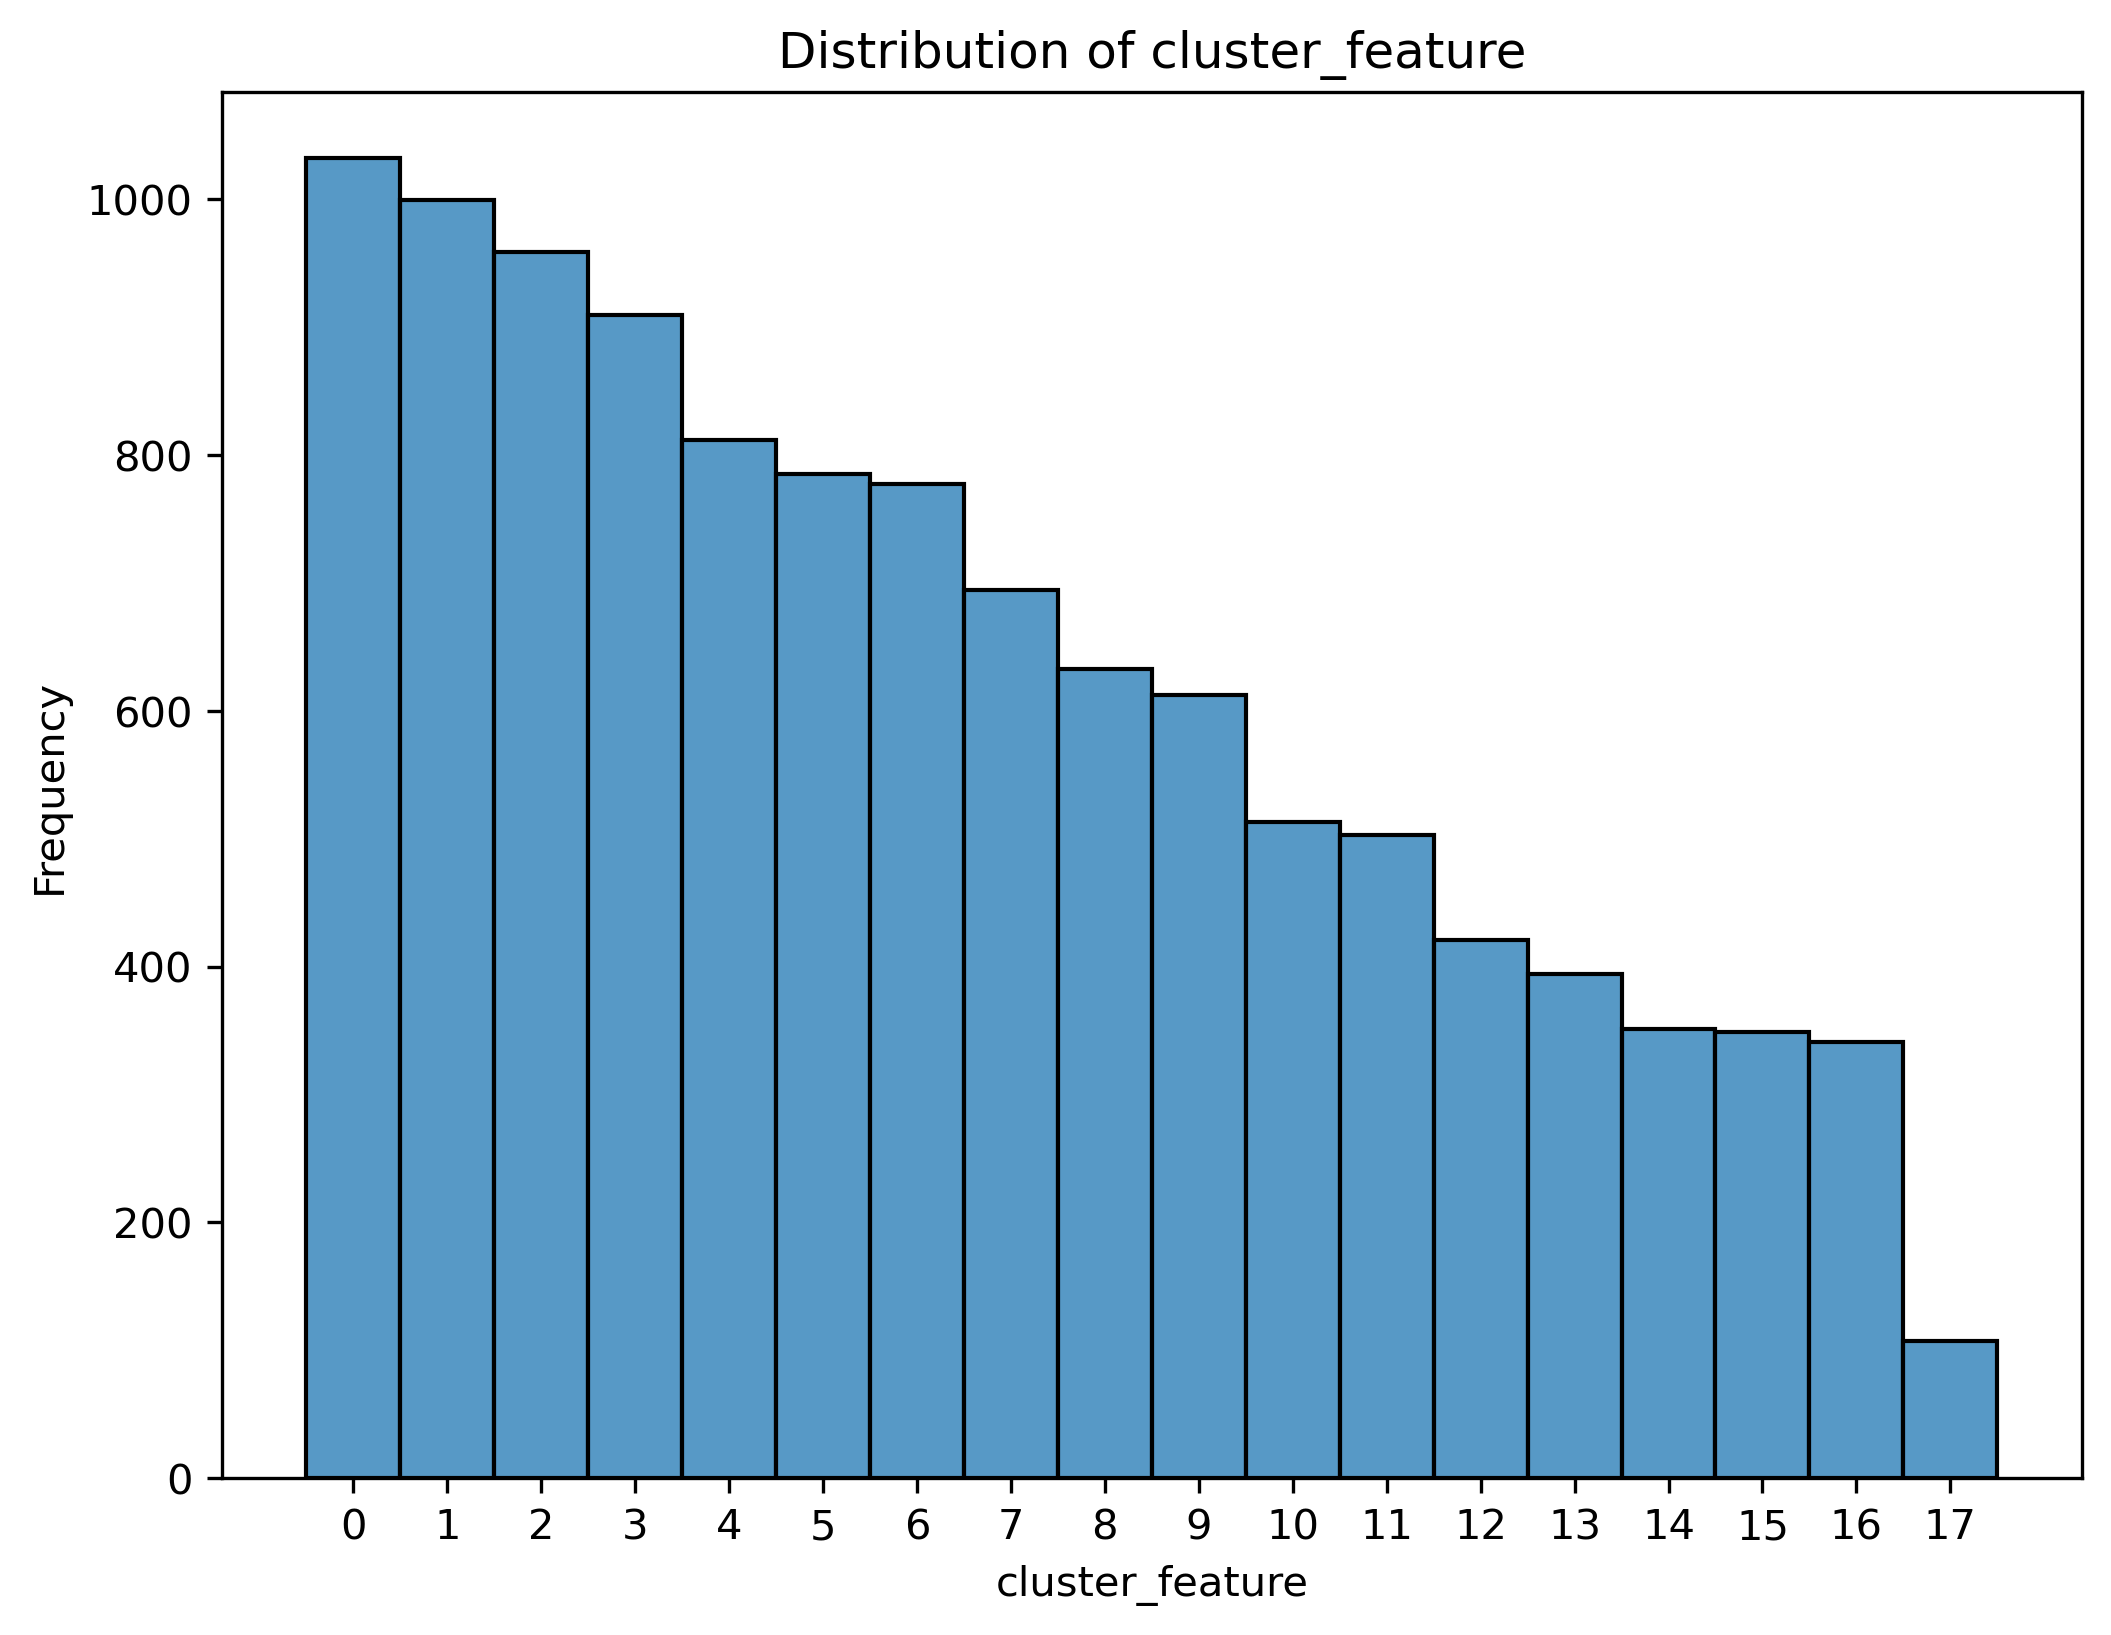

In [28]:
plt.figure(figsize=(8, 6))
sb.histplot(filtered_object.obs['leiden'])
plt.title("Distribution of cluster_feature")
plt.xlabel("cluster_feature")
plt.ylabel("Frequency")
plt.show()

In [29]:
filtered_object.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,...,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
TACCCATTCGAACGCT-1,SeuratProject,112387.0,11611,1922.0,3,TotalSeqB7,TotalSeqB4,2.110876,Hash4_Hash7,Doublet,...,NaN,NaN,NaN,11611,112387.0,3246.0,2.888234,609.0,0.541878,6
TACTCATCACCAGGAC-1,SeuratProject,101605.0,11034,1335.0,2,TotalSeqB7,TotalSeqB6,5.294113,Hash7,Singlet,...,noninf,TotalSeqB7,Magnetic Beads,11034,101605.0,4172.0,4.106097,580.0,0.570838,6
GCTGCGATCCGCCAGA-1,SeuratProject,96436.0,10765,2369.0,4,TotalSeqB3,TotalSeqB1,5.968628,Hash3,Singlet,...,MCMV,TotalSeqB3,Magnetic Beads,10765,96436.0,562.0,0.582770,209.0,0.216724,6
TGCCGTTCATGAATGC-1,SeuratProject,95368.0,10673,1133.0,5,TotalSeqB7,TotalSeqB5,1.610980,Hash5_Hash7,Doublet,...,NaN,NaN,NaN,10673,95368.0,2938.0,3.080698,585.0,0.613413,6
ATCGTTGAGGATCTAT-1,SeuratProject,94100.0,10010,2628.0,1,TotalSeqB4,TotalSeqB1,5.842015,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,10010,94100.0,3261.0,3.465462,303.0,0.321998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,SeuratProject,5298.0,1349,14.0,7,TotalSeqB3,TotalSeqB9,0.695320,Negative,Negative,...,NaN,NaN,NaN,1349,5298.0,0.0,0.000000,4.0,0.075500,11
GCCAATATCCCCTGAC-1,SeuratProject,6784.0,2101,13.0,1,TotalSeqB4,TotalSeqB1,0.992906,Hash4,Singlet,...,MCMV,TotalSeqB4,Magnetic Beads,2101,6784.0,1.0,0.014741,4.0,0.058962,12
GTCCTATTCGCGAATC-1,SeuratProject,6612.0,2059,2.0,2,TotalSeqB1,TotalSeqB6,0.027029,Negative,Negative,...,NaN,NaN,NaN,2059,6612.0,1.0,0.015124,3.0,0.045372,12
AGTGATCCAAAGGTTC-1,SeuratProject,5905.0,1421,5.0,1,TotalSeqB6,TotalSeqB1,1.088662,Negative,Negative,...,NaN,NaN,NaN,1421,5905.0,2.0,0.033870,8.0,0.135478,3


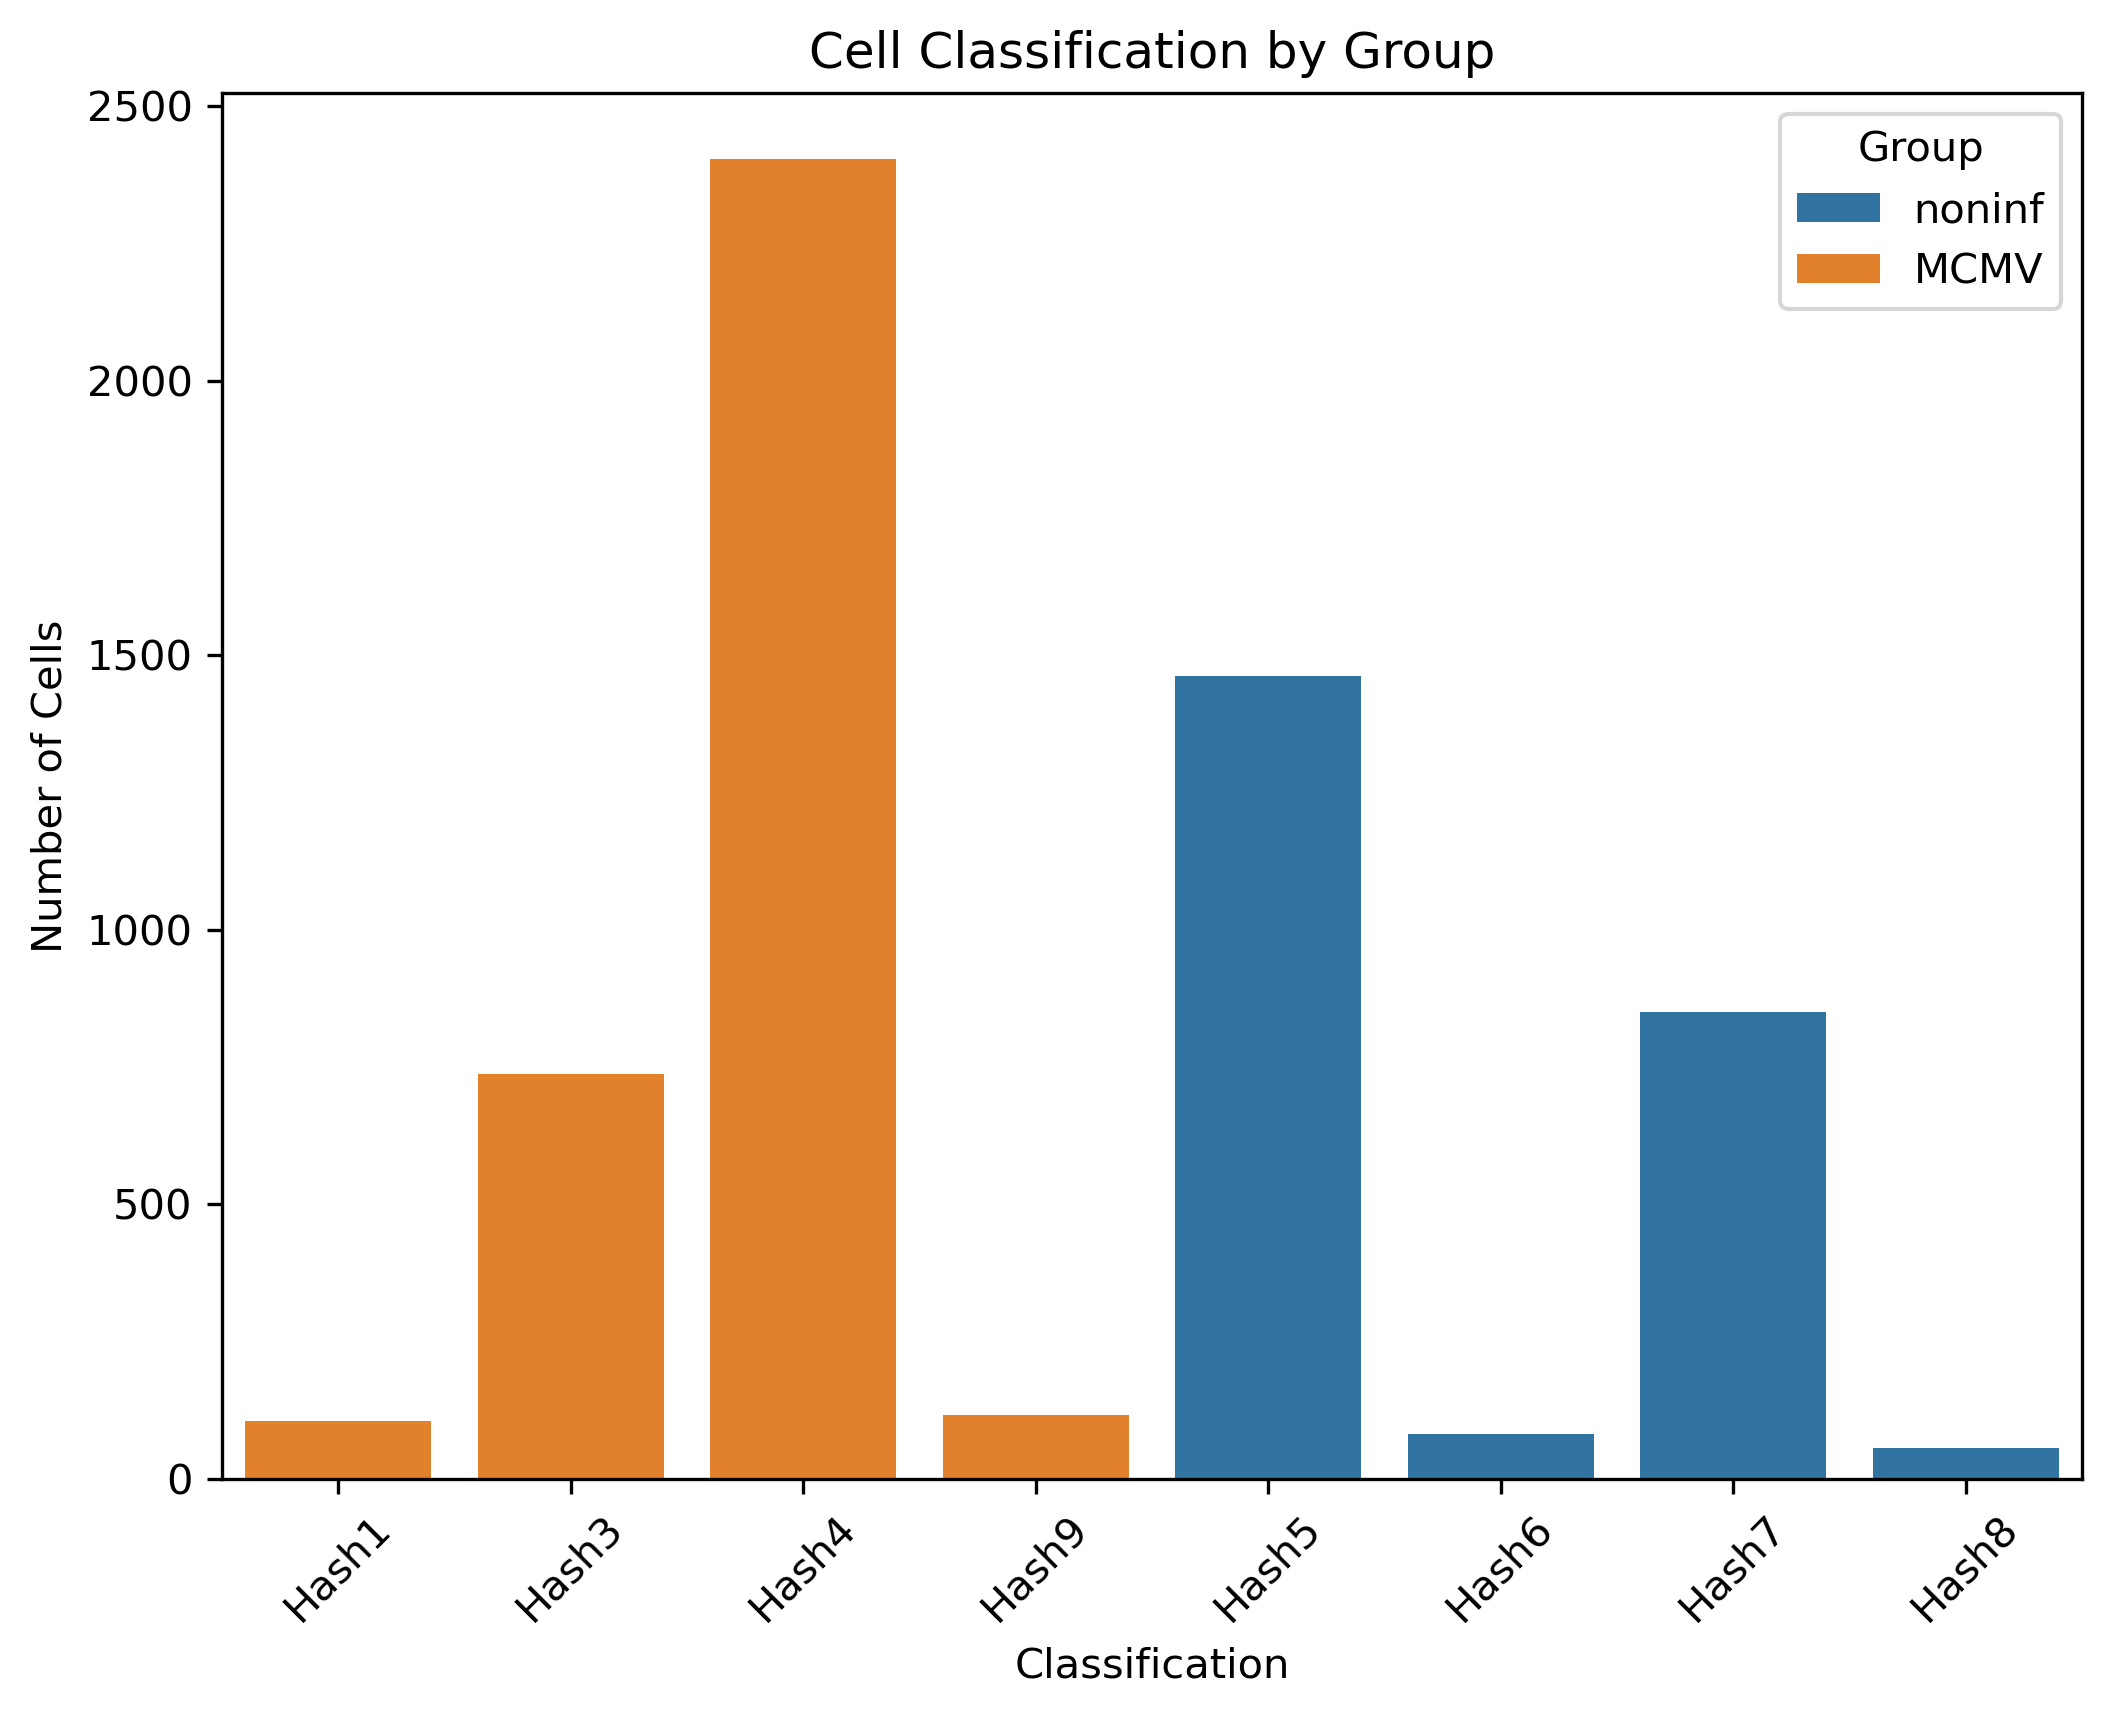

In [30]:
plt.figure(figsize=(8, 6))
sb.countplot(data=without_doublets.obs, x='HTO_classification', hue='Group',order= ['Hash1','Hash3','Hash4','Hash9','Hash5','Hash6','Hash7','Hash8'])
plt.title("Cell Classification by Group")
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

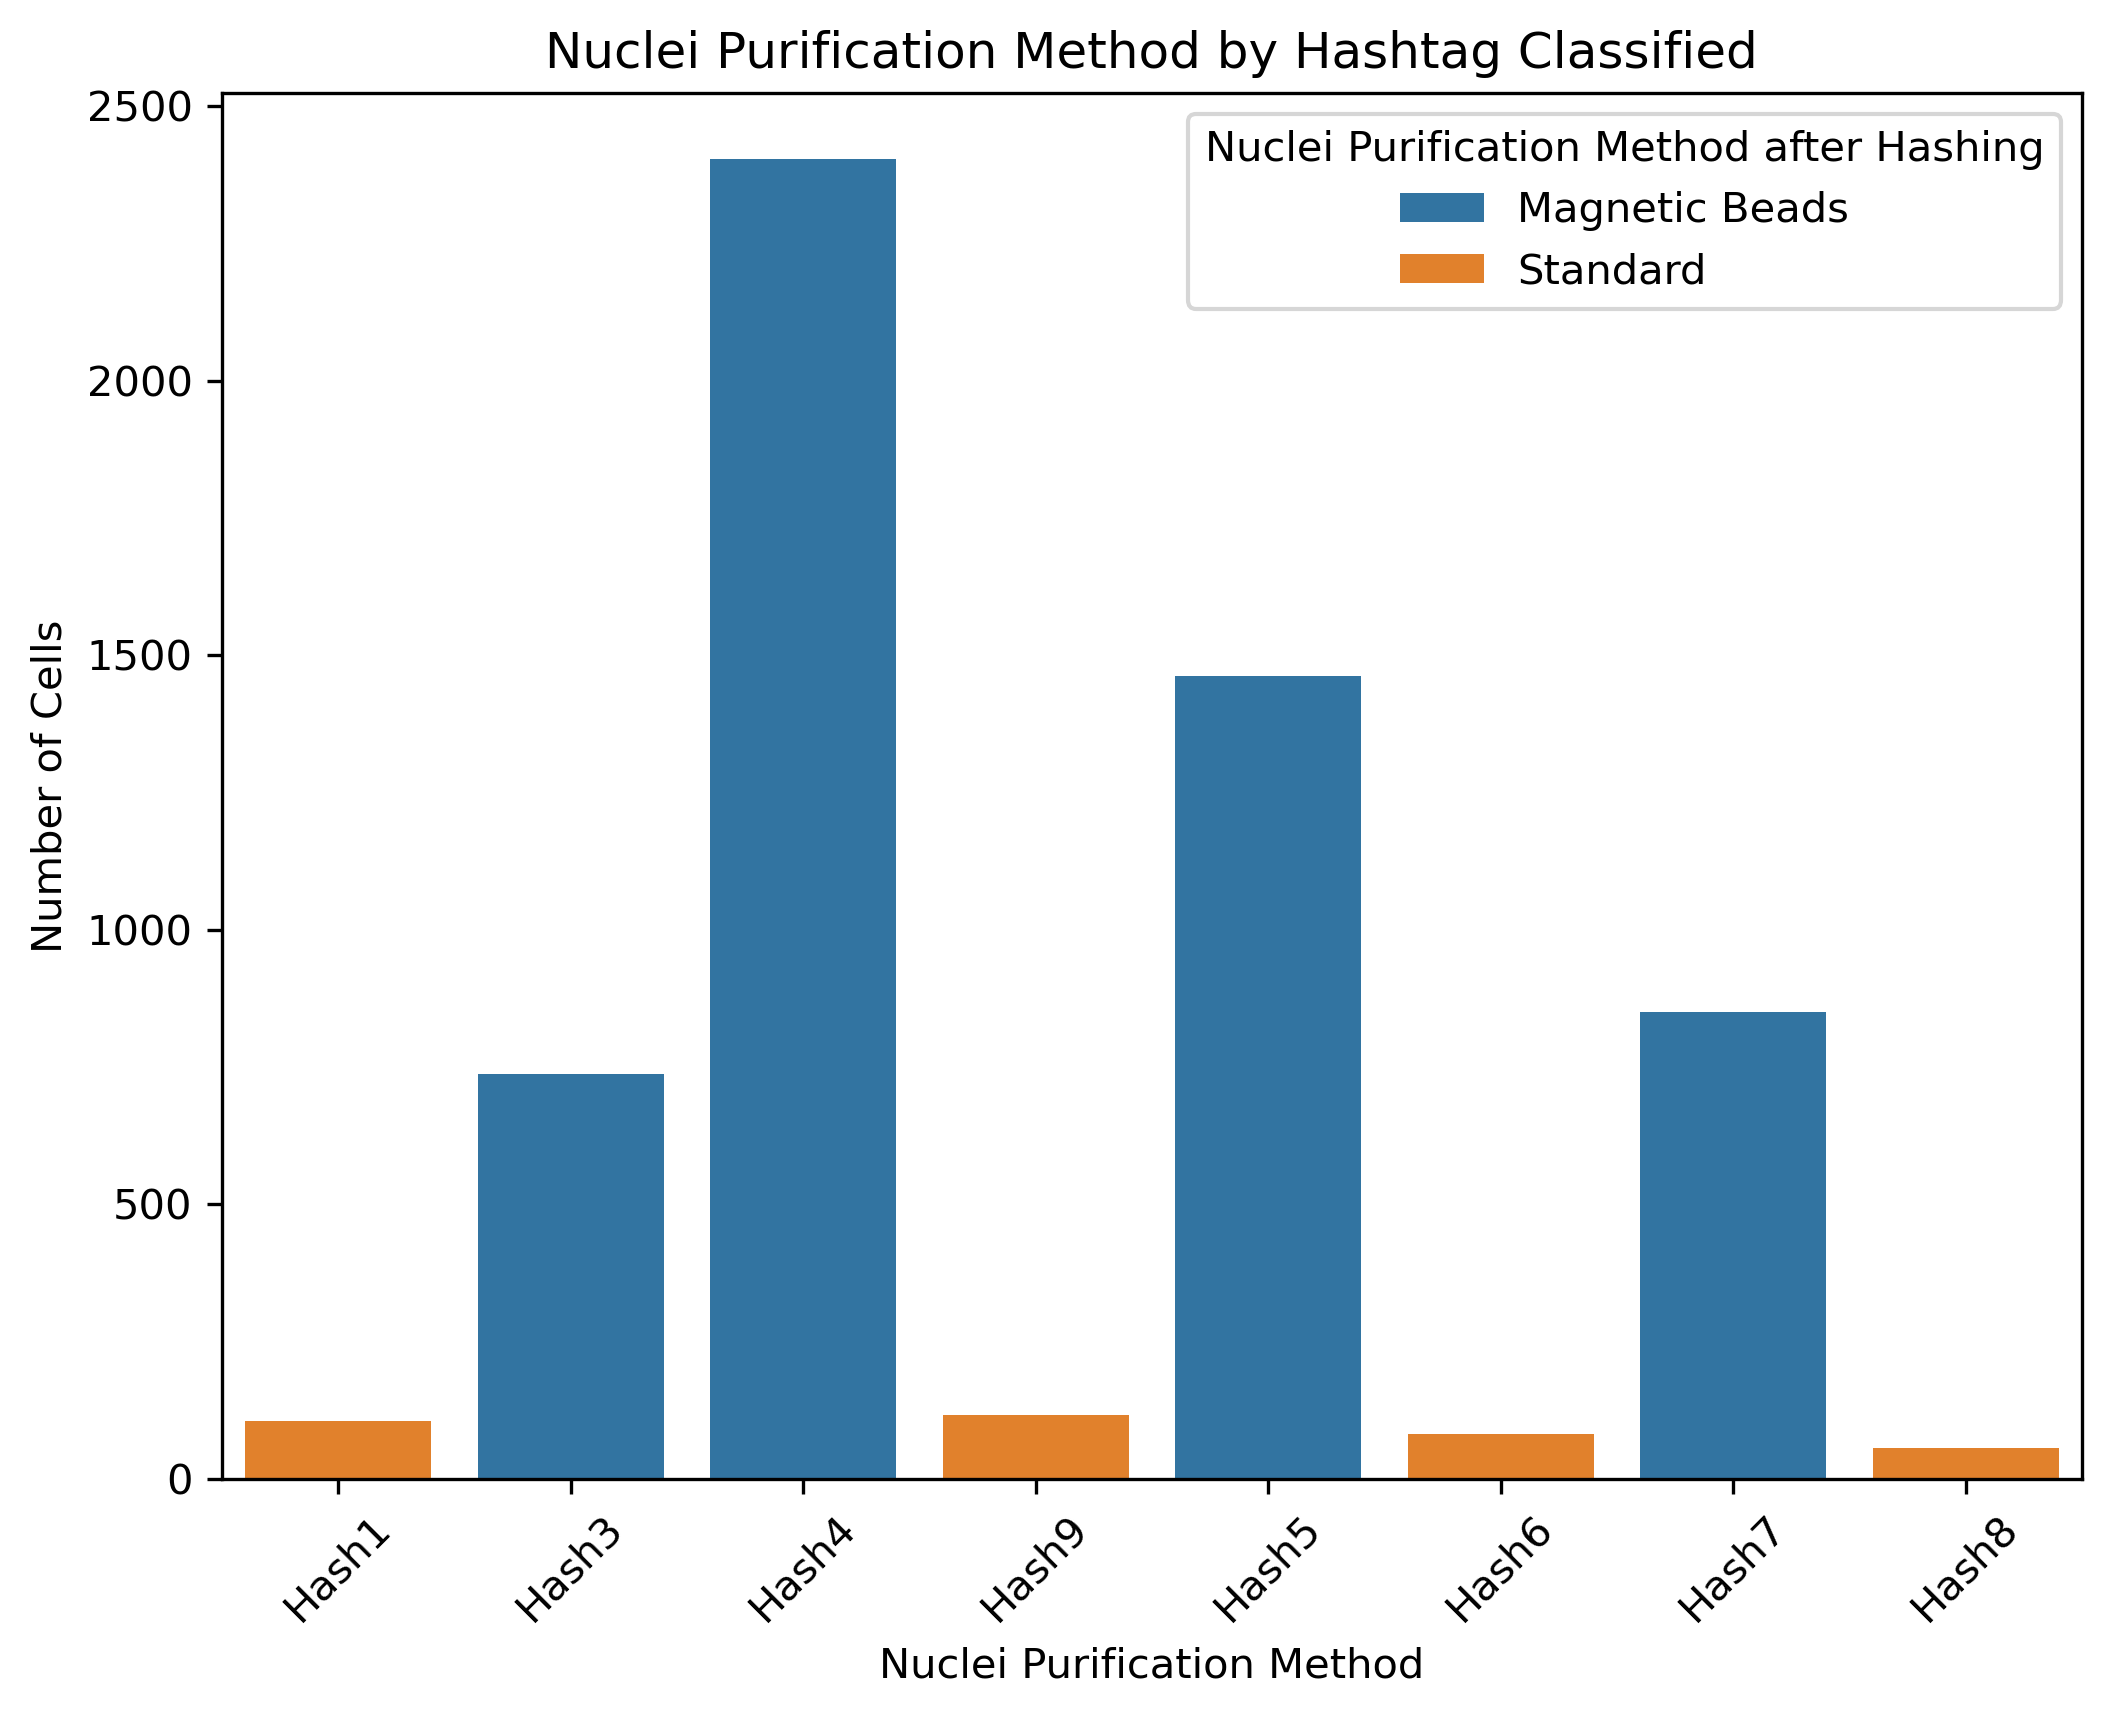

In [31]:
plt.figure(figsize=(8, 6))
sb.countplot(data=without_doublets.obs, hue='Nuclei Purification Method after Hashing',  x='HTO_classification', order= ['Hash1','Hash3','Hash4','Hash9','Hash5','Hash6','Hash7','Hash8'])
plt.title("Nuclei Purification Method by Hashtag Classified")
plt.xlabel("Nuclei Purification Method")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

## Data Export

In [32]:
filtered_object.obs.dtypes

orig.ident                                  category
nCount_RNA                                   float64
nFeature_RNA                                   int32
nCount_HTO                                   float64
nFeature_HTO                                   int32
HTO_maxID                                   category
HTO_secondID                                category
HTO_margin                                   float64
HTO_classification                            object
HTO_classification.global                   category
hash.ID                                     category
ident                                       category
Sample                                        object
Sample-ID                                    float64
Mouse-ID                                      object
Sex                                           object
Group                                         object
Ref hashtag                                   object
Nuclei Purification Method after Hashing      

In [33]:
filtered_object.write_h5ad(f'./Github/Nuclear_hashing_2025/data/demultiplexed_HTODemux_after_cb_{timestamp}.h5ad')